In [2]:
### Import library:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [4]:
### Ler o arquivo:
df = pd.read_csv('emprestimo.csv', ';')

In [5]:
### Visualizar data frame:
df

,montante,idade,salario,tem_conta,empresta
0,Medio,Senior,Baixo,Sim,Nao
1,Medio,Senior,Baixo,Nao,Nao
2,Baixo,Senior,Baixo,Sim,Sim
3,Alto,Media,Baixo,Sim,Sim
4,Alto,Jovem,Alto,Sim,Sim
5,Alto,Jovem,Alto,Nao,Nao
6,Baixo,Jovem,Alto,Nao,Sim
7,Medio,Media,Baixo,Sim,Nao
8,Medio,Jovem,Alto,Sim,Sim
9,Alto,Media,Alto,Sim,Sim


In [6]:
df['tem_conta'], _ = pd.factorize(df['tem_conta'])
print(df['tem_conta'].unique())

[0 1]


In [7]:
df['montante'], _ = pd.factorize(df['montante'])
df['idade'], _ = pd.factorize(df['idade'])
df['empresta'], class_names = pd.factorize(df['empresta'])
df['salario'], _ = pd.factorize(df['salario'])

In [8]:
print(df['montante'].unique())
print(df['idade'].unique())
print(df['empresta'].unique())
print(df['salario'].unique())

[0 1 2]
[0 1 2]
[0 1]
[0 1]


In [9]:
print(class_names)

Index(['Nao', 'Sim'], dtype='object')


# Abordagem 1 - Treinamento usado para teste

In [13]:
# Colunas:
col = ['montante', 'idade', 'salario', 'tem_conta']

In [14]:
x_col = df[col]

In [15]:
x_col

,montante,idade,salario,tem_conta
0,0,0,0,0
1,0,0,0,1
2,1,0,0,0
3,2,1,0,0
4,2,2,1,0
5,2,2,1,1
6,1,2,1,1
7,0,1,0,0
8,0,2,1,0
9,2,1,1,0


In [16]:
y_col = df.empresta

In [17]:
y_col

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: empresta, dtype: int64

In [18]:
x_col.columns

Index(['montante', 'idade', 'salario', 'tem_conta'], dtype='object')

In [20]:
df.columns

Index(['montante', 'idade', 'salario', 'tem_conta', 'empresta'], dtype='object')

In [21]:
classific =  dtc(criterion='entropy')

In [22]:
classific = classific.fit(x_col, y_col)

In [23]:
classific

DecisionTreeClassifier(criterion='entropy')

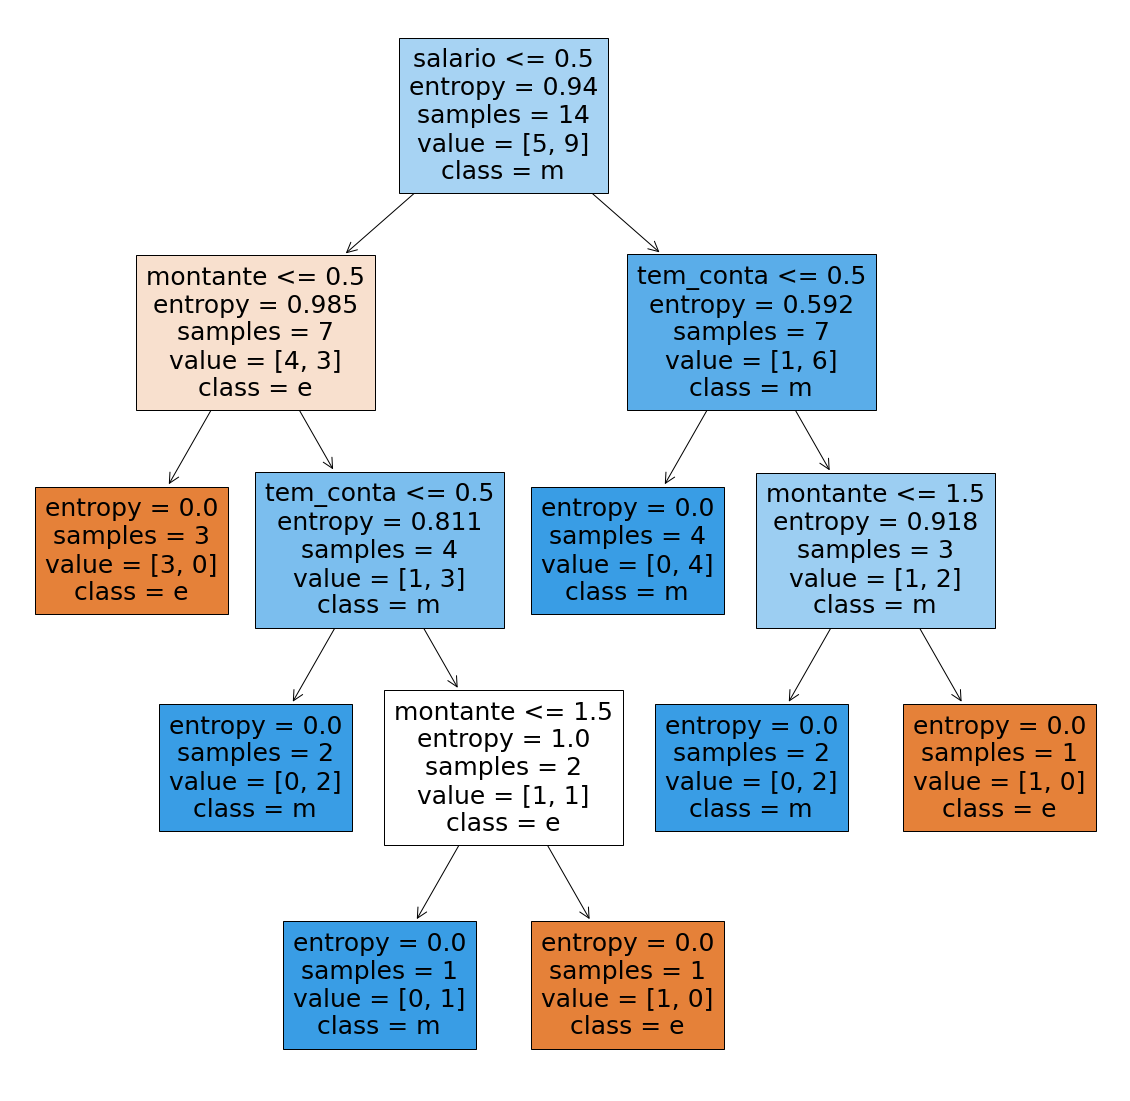

In [25]:
pic1 = plt.figure(figsize=(20,20))
_ = tree.plot_tree(classific, feature_names=x_col.columns, class_names=df.columns[4], filled=True)

# Abordagem 2 - Dados de Treinamento (70%) e Dados de Teste (30%)

In [26]:
col2 = ['montante', 'idade', 'salario', 'tem_conta']

In [27]:
x_col2 = df[col2]

In [29]:
y_col2 = df.empresta

In [30]:
x_col2, x_test, y_col2, y_test = train_test_split(x_col2, y_col2, test_size=0.3, random_state=1)

In [31]:
x_col2

,montante,idade,salario,tem_conta
4,2,2,1,0
1,0,0,0,1
12,1,0,1,0
0,0,0,0,0
13,2,1,0,1
9,2,1,1,0
8,0,2,1,0
11,1,2,0,1
5,2,2,1,1


In [32]:
x_test

,montante,idade,salario,tem_conta
3,2,1,0,0
7,0,1,0,0
6,1,2,1,1
2,1,0,0,0
10,0,1,1,1


In [33]:
classific2 = dtc(criterion="entropy")

In [34]:
classific2 = classific2.fit(x_col2, y_col2)

In [35]:
classific2

DecisionTreeClassifier(criterion='entropy')

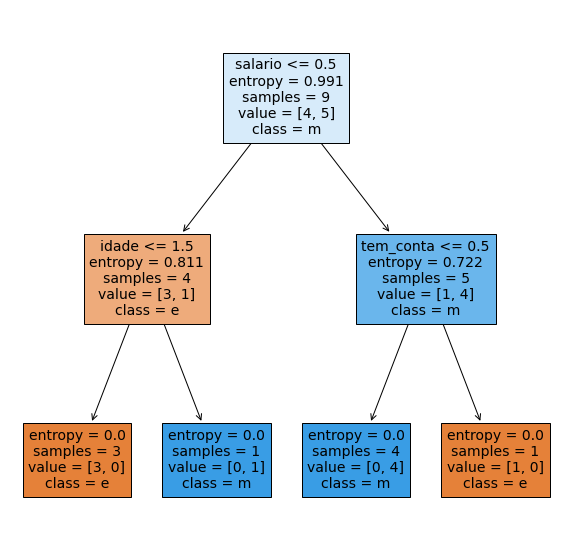

In [38]:
pic2 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(classific2, feature_names=x_col2.columns, class_names=df.columns[4], filled=True)

In [39]:
y_pred = classific2.predict(x_col)

In [40]:
count_misclassified = (y_col != y_pred).sum()

In [41]:
count_misclassified

4

In [42]:
accuracy = metrics.accuracy_score(y_col, y_pred)

In [43]:
accuracy

0.7142857142857143

In [51]:
# testando a entrada montante=1 ; idade=2; salario=1; tem_conta=1
w_test = np.array([[1, 2, 1, 1]])

In [53]:
y_pred = classific2.predict(w_test)

C:\Users\Particular\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [54]:
y_pred

array([0], dtype=int64)

In [55]:
# R: Sim - Linha 6 do dataframe
df

,montante,idade,salario,tem_conta,empresta
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1
5,2,2,1,1,0
6,1,2,1,1,1
7,0,1,0,0,0
8,0,2,1,0,1
9,2,1,1,0,1
